Task 2

2)Stock Market Prediction And Forecasting Using Stacked LSTM

Datasetlinks: : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
df = pd.read_csv("stock_market.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [48]:
df.shape

(2035, 8)

In [4]:
df1 = df.reset_index()['Close']

In [5]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

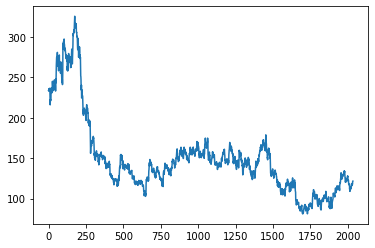

In [6]:
plt.plot(df1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

split the dataset into training and testing part

In [9]:
training_size=int(len(df1)*0.70)
testing_size=len(df1)-training_size
training_data,testing_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [10]:
training_size,testing_size

(1424, 611)

In [11]:
training_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.32618464],
       [0.32271242],
       [0.3247549 ]])

In [12]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
time_step = 100
X_train, y_train = create_dataset(training_data, time_step)
X_test, ytest = create_dataset(testing_data, time_step)

In [14]:
X_train.shape, y_train.shape

((1323, 100), (1323,))

In [15]:
X_test.shape,ytest.shape

((510, 100), (510,))

In [16]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 17s 411ms/step - loss: 0.0327 - val_loss: 0.0062
Epoch 2/100
21/21 [==============================] - 7s 347ms/step - loss: 0.0035 - val_loss: 0.0016
Epoch 3/100
21/21 [==============================] - 7s 337ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 4/100
21/21 [==============================] - 7s 329ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 5/100
21/21 [==============================] - 7s 322ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/100
21/21 [==============================] - 6s 280ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 7/100
21/21 [==============================] - 7s 317ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 8/100
21/21 [==============================] - 6s 309ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/100
21/21 [==============================] - 7s 318ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 10/100
21/21 [==============================] - 7s 323ms/step - loss: 0.0011 - val_l

21/21 [==============================] - 6s 302ms/step - loss: 3.1504e-04 - val_loss: 3.1835e-04
Epoch 77/100
21/21 [==============================] - 6s 307ms/step - loss: 2.8756e-04 - val_loss: 2.8309e-04
Epoch 78/100
21/21 [==============================] - 7s 318ms/step - loss: 2.8984e-04 - val_loss: 3.1449e-04
Epoch 79/100
21/21 [==============================] - 6s 281ms/step - loss: 3.4643e-04 - val_loss: 2.7504e-04
Epoch 80/100
21/21 [==============================] - 7s 318ms/step - loss: 3.2859e-04 - val_loss: 2.5269e-04
Epoch 81/100
21/21 [==============================] - 6s 303ms/step - loss: 3.0044e-04 - val_loss: 2.8093e-04
Epoch 82/100
21/21 [==============================] - 5s 243ms/step - loss: 2.7725e-04 - val_loss: 2.6450e-04
Epoch 83/100
21/21 [==============================] - 6s 301ms/step - loss: 3.0653e-04 - val_loss: 2.3272e-04
Epoch 84/100
21/21 [==============================] - 6s 279ms/step - loss: 2.7608e-04 - val_loss: 2.7196e-04
Epoch 85/100
21/21 [===

In [21]:
import tensorflow as tf

In [22]:
tf.__version__

'2.6.0'

In [23]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [24]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

163.81753201130635

In [26]:
math.sqrt(mean_squared_error(ytest,test_predict))

107.37900927111649

In [27]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

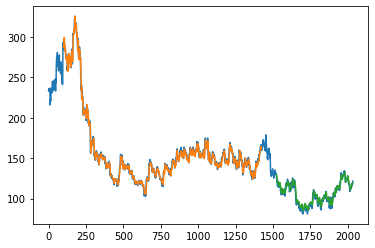

In [28]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
len(testing_data)

611

In [32]:
x_input=testing_data[341:].reshape(1,-1)
x_input.shape

(1, 270)

In [33]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [34]:
temp_input

[0.08721405228758167,
 0.08986928104575165,
 0.10498366013071897,
 0.08905228758169931,
 0.10355392156862742,
 0.10375816993464049,
 0.12275326797385616,
 0.1090686274509804,
 0.09660947712418294,
 0.10641339869281041,
 0.10457516339869277,
 0.11049836601307189,
 0.11274509803921567,
 0.0980392156862745,
 0.09987745098039214,
 0.08925653594771238,
 0.07475490196078427,
 0.08169934640522875,
 0.08925653594771238,
 0.09068627450980393,
 0.08129084967320255,
 0.08823529411764702,
 0.08455882352941174,
 0.07945261437908496,
 0.08374183006535946,
 0.0778186274509804,
 0.09824346405228757,
 0.090890522875817,
 0.09007352941176466,
 0.09558823529411759,
 0.06862745098039214,
 0.06372549019607837,
 0.04942810457516339,
 0.04799836601307189,
 0.04534313725490191,
 0.044321895424836555,
 0.03941993464052285,
 0.03799019607843135,
 0.04656862745098034,
 0.05085784313725489,
 0.07209967320261434,
 0.065359477124183,
 0.07230392156862747,
 0.07802287581699341,
 0.07741013071895425,
 0.0608660130718

In [35]:
from numpy import array

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [44]:
len(df1)

2035

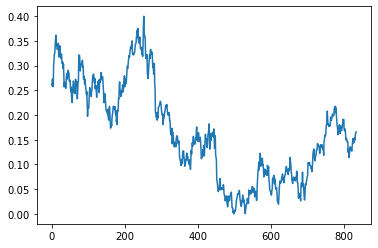

In [45]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [46]:
df3=scaler.inverse_transform(df3).tolist()

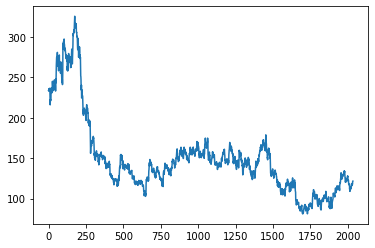

In [47]:
plt.plot(df3)